In [1]:
!pip install d2l
!pip install matplotlib==3.0.2

     |████████████████████████████████| 82 kB 513 kB/s 
     |████████████████████████████████| 61 kB 5.7 MB/s 
     |████████████████████████████████| 11.2 MB 37.2 MB/s 
     |████████████████████████████████| 9.9 MB 24.1 MB/s 
     |████████████████████████████████| 900 kB 9.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you ha

     |████████████████████████████████| 12.9 MB 4.9 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.6.0 requires matplotlib>=3.1.1, but you have matplotlib 3.0.2 which is incompatible.
mizani 0.6.0 requires matplotlib>=3.1.1, but you have matplotlib 3.0.2 which is incompatible.
d2l 0.17.5 requires matplotlib==3.5.1, but you have matplotlib 3.0.2 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [1]:
import torch
from torch import nn
from d2l import torch as d2l

## 1. Model

Dibandingkan dengan implementasi singkat, implementasi regresi softmax.

Perbedaannya adalah ditambahkan dua layer yang terhubung penuh (sebelumnya, hanya ditambahkan satu).

dimana yang pertama adalah hidden layer yang berisi 256 hidden unit dan menerapkan fungsi aktivasi ReLU.

yang kedua adalah output layer.

In [2]:
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(784, 256),
                    nn.ReLU(),
                    nn.Linear(256, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);

Training loop sama persis seperti saat diimplementasukan regresi softmax. Modularitas memungkinkan pemakai untuk dapat memisahkan hal-hal yang berkaitan dengan arsitektur model dari pertimbangan ortogonal

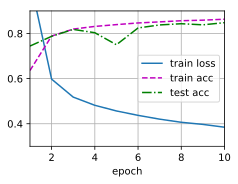

In [3]:
batch_size, lr, num_epochs = 256, 0.1, 10
loss = nn.CrossEntropyLoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(), lr=lr)

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

## Summary

*   Dengan menggunakan API tingkat tinggi, kita dapat mengimplementasikan MLP dengan lebih ringkas.
*   Untuk masalah klasifikasi yang sama, implementasi MLP sama dengan regresi softmax kecuali untuk lapisan tersembunyi tambahan dengan fungsi aktivasi.

